In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Ridge_Regression_with_5datasets/concrete/Concrete_Data.xls")

In [4]:
data.shape

(1030, 9)

In [5]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

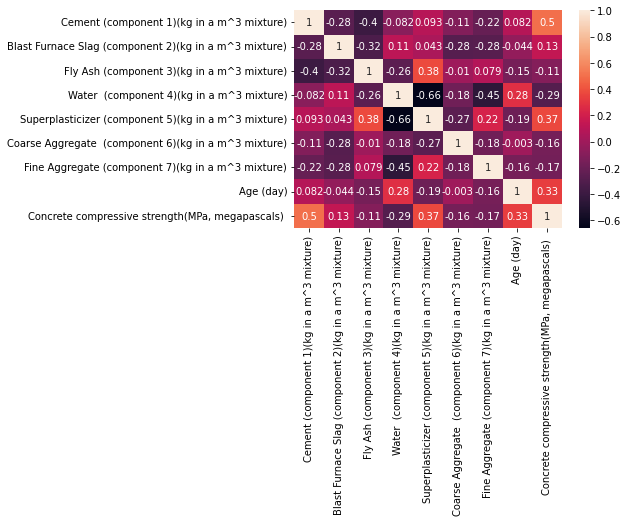

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
data.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

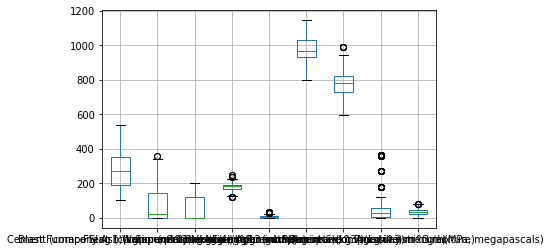

In [12]:
data.boxplot(column=['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '])
plt.show()

In [13]:
def iqr_capping(data,col):
  for i in col:

    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1

    upper_whisker = q3 + (1.5*iqr)
    lower_whisker = q1 - (1.5*iqr)

    data[i] = np.where(data[i] > upper_whisker,upper_whisker,np.where(data[i] < lower_whisker,lower_whisker,data[i]))



In [14]:
iqr_capping(data,data.columns)

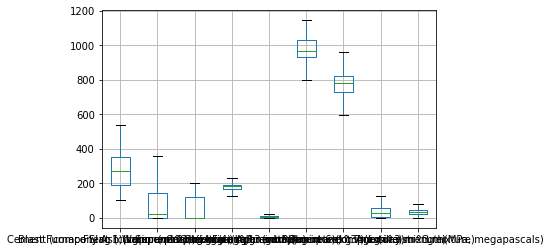

In [15]:
data.boxplot(column=['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '])
plt.show()

In [16]:
from scipy.stats import skew
for i in data:
  print(i)
  print(skew(data[i]))

  '''plt.figure()
  sns.distplot(data[i])
  plt.show()'''

Cement (component 1)(kg in a m^3 mixture)
0.5087751165101829
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
0.7985791761294994
Fly Ash (component 3)(kg in a m^3 mixture)
0.5366621062585285
Water  (component 4)(kg in a m^3 mixture)
0.05504595038839604
Superplasticizer (component 5)(kg in a m^3 mixture)
0.6646941900602548
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
-0.04014782595005173
Fine Aggregate (component 7)(kg in a m^3 mixture)
-0.2856311268331474
Age (day)
1.2623658276486296
Concrete compressive strength(MPa, megapascals) 
0.4114201305369138


In [17]:
data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] = np.sqrt(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])
data['Superplasticizer (component 5)(kg in a m^3 mixture)'] = np.sqrt(data['Superplasticizer (component 5)(kg in a m^3 mixture)'])
data['Fly Ash (component 3)(kg in a m^3 mixture)'] = np.sqrt(data['Fly Ash (component 3)(kg in a m^3 mixture)'])
data['Cement (component 1)(kg in a m^3 mixture)'] = np.log(data['Cement (component 1)(kg in a m^3 mixture)'])
data['Age (day)'] = np.log(data['Age (day)'])

In [18]:
for i in data:
  print(i)
  print(skew(data[i]))


Cement (component 1)(kg in a m^3 mixture)
-0.12953434597285954
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
0.25643287330690895
Fly Ash (component 3)(kg in a m^3 mixture)
0.3075559567418236
Water  (component 4)(kg in a m^3 mixture)
0.05504595038839604
Superplasticizer (component 5)(kg in a m^3 mixture)
-0.19417060246899248
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
-0.04014782595005173
Fine Aggregate (component 7)(kg in a m^3 mixture)
-0.2856311268331474
Age (day)
-0.43902690740945355
Concrete compressive strength(MPa, megapascals) 
0.4114201305369138


In [19]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)

(824, 8)
(206, 8)


In [21]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
data = standardizer.fit(data).transform(data)

In [22]:
import time
start_time = time.time()

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r1 = Ridge(alpha=1)
r1.fit(X_train,y_train)
pred_train_r1 = r1.predict(X_train)

print('train R^2:',r2_score(y_train,pred_train_r1))
print('train mean square error:',(mean_squared_error(y_train,pred_train_r1)))
print('train root mean square error:',np.sqrt(mean_squared_error(y_train,pred_train_r1)))
print('train mean absolute error',mean_absolute_error(y_train,pred_train_r1))
print('-----------------------------------------')

pred_test_r1 = r1.predict(X_test)

print('test R^2:',r2_score(y_test,pred_test_r1))
print('test mean square error:',(mean_squared_error(y_test,pred_test_r1)))
print('test root mean square error:',np.sqrt(mean_squared_error(y_test,pred_test_r1)))
print('test mean absolute error',mean_absolute_error(y_test,pred_test_r1))
print('-----------------------------------------')

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.8330180006700997
train mean square error: 48.304225479262506
train root mean square error: 6.950124134090161
train mean absolute error 5.5330442423746895
-----------------------------------------
test R^2: 0.8059839789607206
test mean square error: 45.50419816881553
test root mean square error: 6.745679963414773
test mean absolute error 5.305672806896504
-----------------------------------------
Time taken : 0.2627263069152832


In [23]:
r1.coef_

array([ 2.78302108e+01,  1.07440977e+00,  3.63399909e-01, -1.99841103e-01,
        1.02560405e+00,  4.89387016e-03, -6.13590832e-03,  9.02138432e+00])

In [24]:
start_time = time.time()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
tuning = GridSearchCV(r1, param_grid,cv=5)
tuning.fit(X_train,y_train)
print(tuning.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

{'alpha': 0.1}
Time taken : 0.40613555908203125


In [25]:
r1 = Ridge(alpha=tuning.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=0.1)

In [26]:
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
r1 = Ridge()
param_dist = {'alpha': uniform(0,10)}
random = RandomizedSearchCV(r1, param_distributions = param_dist,n_iter=100,cv=5)
random.fit(X_train,y_train)
print('best hyperparameters:',random.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

best hyperparameters: {'alpha': 0.17304819369059143}
Time taken : 4.885873079299927


In [27]:
r1 = Ridge(alpha=random.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=0.17304819369059143)

In [28]:
start_time = time.time()

from sklearn.ensemble import AdaBoostRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
ada = AdaBoostRegressor(estimator=r1,n_estimators=50,learning_rate=0.1)
ada.fit(X_train,y_train)
train_score = ada.score(X_train,y_train)
test_score = ada.score(X_test,y_test)
print('train r2:',train_score)
print('test r2:',test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train r2: 0.8311298356564407
test r2: 0.7953666293322601
Time taken : 0.6118588447570801


In [29]:
start_time = time.time()

from xgboost import XGBRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
boosting = XGBRegressor()
boosting.fit(X_train,y_train)

strength_pred_train = boosting.predict(X_train)
strength_pred_test = boosting.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

Time taken : 2.804610252380371


In [30]:
print('train R^2:',r2_score(y_train,strength_pred_train))
print('train mean square error:',(mean_squared_error(y_train,strength_pred_train)))
print('train root mean square error:',np.sqrt(mean_squared_error(y_train,strength_pred_train)))
print('train mean absolute error',mean_absolute_error(y_train,strength_pred_train))

train R^2: 0.9959164519968544
train mean square error: 1.1812807625427497
train root mean square error: 1.0868674079862501
train mean absolute error 0.3934343312265431


In [31]:
print('test R^2:',r2_score(y_test,strength_pred_test))
print('test mean square error:',(mean_squared_error(y_test,strength_pred_test)))
print('test root mean square error:',np.sqrt(mean_squared_error(y_test,strength_pred_test)))
print('test mean absolute error',mean_absolute_error(y_test,strength_pred_test))

test R^2: 0.8923157680065334
test mean square error: 25.256082492771878
test root mean square error: 5.02554300476793
test mean absolute error 3.142847326221819
